In [2]:
from scipy.stats import binom
from scipy.integrate import simps, trapz
from scipy.misc import comb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a) $X\sim \text{Binomial}(N,r)$.


b) Para calcular $\mathbb{P}(X=18$ | $r=0.5)$, notemos que $X\sim \text{Binomial}(N,r)$, con pmf:
\begin{align}
f_{X}(x) = \binom{N}{x}r^{x}(1-r)^{N-x}
\end{align}

donde $N$ es el número de encuestados, $r$ la probabilidad de escoger la respuesta 1) y $x$ la cantidad de personas escogiéndola. Ahora, seteando $N=33$, $X=18$ y $r=0.5$ obtenemos:

\begin{align}
 \mathbb{P}(X=18 | r=0.5) &= f_{X}(x=18) \\
 &= \binom{33}{18}0.5^{33} \\
 &= 0.12
\end{align}

In [3]:
prob = binom(33,0.5).pmf(18)
print prob

0.120741119608


Es decir, hay un $12\%$ de obtener exactamente 18 personas, de un total de 33, que hayan elegido la primera respuesta.

Ahora bien, simulamos 1000 elecciones y vemos $\mathbb{P}(X=18$ | $r=0.5)$:




In [4]:
X = np.zeros(1000)
for i in range(len(X)):
    sim = np.random.random_integers(1, 2,33)
    X[i] = np.sum(sim[sim==1])
       
p_x18 = X[X == 18]
print len(p_x18)/1000.

0.118


Como se puede ver, la probabilidad es pŕacticamente la misma que en el caso de la encuesta en twitter.

c) Recordemos el teorema de Bayes:

\begin{align}
 \mathbb{P}(A_{i}|B) = \frac{\mathbb{P}(B|A_{i}) \mathbb{P}(A_{i}) }{\sum\limits_{j} \mathbb{P}(B|A_{j})\mathbb{P}(A_{j}) } \\
\end{align}

Ahora, debemos calcular usando este teorema $\mathbb{P}(r$ | $X)$:

\begin{align}
\mathbb{P}(r\text{ | } X) = \frac{ \overbrace{\mathbb{P}(X \text{ | } r)}^{\mathbb{P} \text{ en b})}  \overbrace{\mathbb{P} (r)}^{ =\text{ 1}}  }{ \underbrace{\sum\limits_{j} \mathbb{P}(X\text{ | } r) \underbrace{\mathbb{P}(r)}_{\text{= 1}} }_{\mathbb{P}(X)} }
\end{align}

¿Por qué decimos que $\mathbb{P}(r)$= 1? Como no tenemos información alguna de cómo distribuye r, lo más sensato es asumir que $r \sim \text{Uniforme }(0,1)$; es decir:
 
\begin{align}
f_{r}({\bf r}) = 
\begin{cases}
               1 \text{            si } 0\leq {\bf r}\leq 1\\
               0 \text{ si no}
\end{cases}
\end{align}

Ahora bien, el denominador de $\mathbb{P}(r\text{ | }X)$ lo evaluamos pensándolo como una integral con $X=18$ y $N=33$:

\begin{align}
\sum\limits_{j} \mathbb{P}(X=18|r) \approx \int_{0}^{1}  \mathbb{P}(X=18|r)\text{d$r$}
\end{align}

0.0294117647059 0.0294117647059


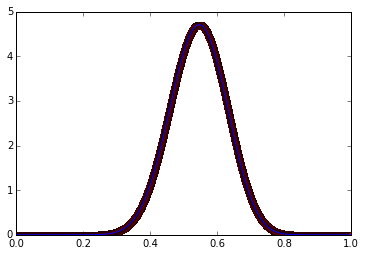

Integral de f 1.000, máximo en 0.545
Integral de f1 1.000, máximo en 0.545


In [5]:
x = np.linspace(0,1,1000000)
binomial = binom(33,x).pmf(18) 

x1 = np.sort(np.random.uniform(0,1,1000000))
binomial1 = binom(33,x1).pmf(18)

fig, ax = plt.subplots()

integral = simps(binomial,x)
integral1 = simps(binomial1,x1) 

print integral,integral1 #Mostrar que da lo mismo cómo elegía 'x' ya que para n grande son idénticos en la práctica

distr = binomial/integral
distr1 = binomial1/integral1

integral_distr = simps(distr,x)
integral_distr1 = simps(distr1,x1)

ax.plot(x1,distr1,'ro',x,distr,'blue')
plt.show()

print 'Integral de f %.3f, máximo en %.3f'% (integral_distr, x[np.argmax(distr)] )
print 'Integral de f1 %.3f, máximo en %.3f'% (integral_distr1, x1[np.argmax(distr1)] )

Ya demostramos que la pdf (pmf) está bien normalizada. Para calcular la CDF, notemos que asignamos $\mathbb{P}(-\infty \lt r \lt 0) = 0 $, por lo cual será irrelevante en la gráfica. Ahora bien, usaremos la pdf ya definida, pero ahora 'guardaremos' cada valor de la integral en el intervalo que nos interesa ($0\leq r \leq 1$):   

In [6]:
x3 = np.sort(np.random.uniform(0,1,1000))  #por 'diversión'
cumulative = np.zeros(1000)
for i in range(len(cumulative)):
    if i > 0: #Necesario para poder integrar: 'al menos dos puntos' 
       cumulative[i] = simps(binom(33,x3[0:i]).pmf(18),x3[0:i]) 
    else:
       cumulative[i] = binom(33,x3[i]).pmf(18)

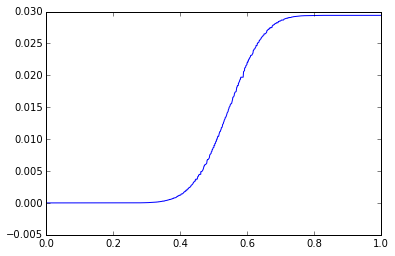

In [7]:
plt.plot(x3,cumulative)
plt.show()

d) Solo debemos calcular $\mathbb{P}(r \text{ < 0.5 | }X)$ ya que $\mathbb{P}(r \text{ > 0.5 | }X)=$  $ 1 - \mathbb{P}(r \text{ < 0.5 | }X) - \mathbb{P}(X=18 \text{ | } r=0.5)$ . Para hacerlo, necesitamos el valor de la CDF en $r=0.5$ | $X=18$, y luego restar el valor obtenido en b):

In [10]:
x4 = np.linspace(0,0.5,10000) #me aseguro del límite de la CDF con linspace
distr2 = binom(33,x4).pmf(18)/integral
intdi2 = simps(distr2,x4)
intminor = intdi2 - prob
intmayor = 1 - (intminor + prob)
print 'Probabilidad para r < 0.5: %.3f \nProbabilidad para r > 0.5: %.3f'% (intminor,intmayor)

Probabilidad para r < 0.5: 0.183 
Probabilidad para r > 0.5: 0.696


Lo cual es consistente con la respuesta encontrada en c), ya que el máximo de la distribución se encuentra en $r=0.545$ , es decir, que probamos que es más probable que la gente escoja la opción de quedarse con su puerta!